In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics
import time

# to ignore the warnings
from warnings import filterwarnings

In [105]:
scores_df = pd.read_excel('./data/game_scores.xlsx')
scores_df.head()

,date,visitor,home,visitor_points,home_points
0,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [106]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14242 non-null  object 
 1   visitor         14242 non-null  object 
 2   home            14242 non-null  object 
 3   visitor_points  12740 non-null  float64
 4   home_points     12740 non-null  float64
dtypes: float64(2), object(3)
memory usage: 556.5+ KB


In [107]:
# Find columns and total null values
scores_df.isnull().sum()

date                 0
visitor              0
home                 0
visitor_points    1502
home_points       1502
dtype: int64

In [108]:
# Convert date object to datetime data type
scores_df['date'] = pd.to_datetime(scores_df['date'], errors='coerce')
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            13926 non-null  datetime64[ns, UTC]
 1   visitor         14242 non-null  object             
 2   home            14242 non-null  object             
 3   visitor_points  12740 non-null  float64            
 4   home_points     12740 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 556.5+ KB


In [109]:
# Find rows that contain null values
scores_df[scores_df['visitor_points'].isnull()]

,date,visitor,home,visitor_points,home_points
23,2024-11-05 00:45:00+00:00,Boston Celtics,Atlanta Hawks,NaN,NaN
46,2024-11-13 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
47,2025-01-19 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
82,2025-03-16 22:00:00+00:00,Atlanta Hawks,Brooklyn Nets,NaN,NaN
83,2025-04-10 23:30:00+00:00,Atlanta Hawks,Brooklyn Nets,NaN,NaN
...,...,...,...,...,...
14210,NaT,Toronto Raptors,Washington Wizards,NaN,NaN
14220,2025-01-30 00:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14221,2025-03-24 23:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14231,2025-03-06 00:00:00+00:00,Utah Jazz,Washington Wizards,NaN,NaN


In [110]:
# Getting today's date
todays_Date = dt.date.fromtimestamp(time.time())
 
# Calling the isoformat() function over the
# today's date
date_in_ISOFormat = todays_Date.isoformat()

# Create a dataframe with no dates past current day
df = scores_df.loc[scores_df['date'] <= date_in_ISOFormat]

# Reset index
df.reset_index(inplace=True, drop=True)

# Display
df

,date,visitor,home,visitor_points,home_points
0,2015-11-25 01:00:00+00:00,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09 23:30:00+00:00,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16 23:00:00+00:00,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19 23:00:00+00:00,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27 00:30:00+00:00,Boston Celtics,Atlanta Hawks,83.0,110.0
...,...,...,...,...,...
12775,2020-02-29 02:00:00+00:00,Washington Wizards,Utah Jazz,119.0,129.0
12776,2021-04-13 01:00:00+00:00,Washington Wizards,Utah Jazz,125.0,121.0
12777,2021-12-19 02:00:00+00:00,Washington Wizards,Utah Jazz,109.0,103.0
12778,2022-12-23 02:00:00+00:00,Washington Wizards,Utah Jazz,112.0,120.0


# Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_13088\1752581283.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matchup_game, x='winner', ax=axes[1], palette='Set2')


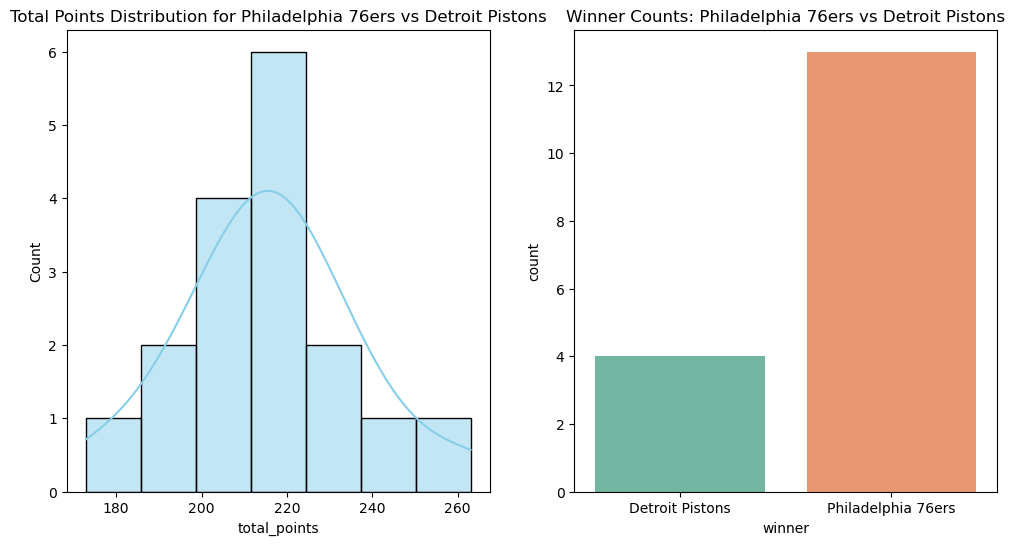

Statistics of Detroit Pistons vs Philadelphia 76ers
------------------------------------
Mean: 215.8235294117647
Standard Deviation: 20.950045626792935
Max: <built-in function max>
Min: <built-in function min>
------------------------------------
z-score for 211.5: -0.21
z-score for 212.5: -0.16
z-score for 213.5: -0.11
z-score for 214.5: -0.06
z-score for 215.5: -0.02
z-score for 216.5: 0.03
z-score for 217.5: 0.08
z-score for 218.5: 0.13
z-score for 219.5: 0.18
z-score for 220.5: 0.22
z-score for 221.5: 0.27
z-score for 222.5: 0.32
z-score for 223.5: 0.37
z-score for 224.5: 0.41
z-score for 225.5: 0.46


,date,visitor,home,visitor_points,home_points,total_points,winner
6307,2015-12-12 00:00:00+00:00,Detroit Pistons,Philadelphia 76ers,107.0,95.0,202.0,Detroit Pistons
6308,2016-03-13 00:00:00+00:00,Detroit Pistons,Philadelphia 76ers,125.0,111.0,236.0,Detroit Pistons
6309,2016-10-15 23:00:00+00:00,Detroit Pistons,Philadelphia 76ers,97.0,76.0,173.0,Detroit Pistons
6310,2017-03-04 23:00:00+00:00,Detroit Pistons,Philadelphia 76ers,136.0,106.0,242.0,Detroit Pistons
6311,2017-12-03 00:30:00+00:00,Detroit Pistons,Philadelphia 76ers,103.0,108.0,211.0,Philadelphia 76ers
6312,2018-01-06 00:00:00+00:00,Detroit Pistons,Philadelphia 76ers,78.0,114.0,192.0,Philadelphia 76ers
6313,2018-11-03 17:00:00+00:00,Detroit Pistons,Philadelphia 76ers,99.0,109.0,208.0,Philadelphia 76ers
6314,2018-12-11 00:00:00+00:00,Detroit Pistons,Philadelphia 76ers,102.0,116.0,218.0,Philadelphia 76ers
6315,2020-03-11 23:00:00+00:00,Detroit Pistons,Philadelphia 76ers,106.0,124.0,230.0,Philadelphia 76ers
6316,2019-10-15 23:00:00+00:00,Detroit Pistons,Philadelphia 76ers,86.0,106.0,192.0,Philadelphia 76ers


In [127]:
def possible_outcome(dataframe, away_team, home_team, first_line): 
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[(dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)
        
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
      
    # Plot total points distribution with a KDE
    sns.histplot(data=matchup_game, x='total_points', kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Total Points Distribution for {home_team} vs {away_team}')
    
    # Plot the winner count    
    sns.countplot(data=matchup_game, x='winner', ax=axes[1], palette='Set2')
    axes[1].set_title(f'Winner Counts: {home_team} vs {away_team}')
        
    # Display the plots
    plt.show()
    
     # Calculate a z-score from a provided mean and standard deviation
    mean = matchup_game['total_points'].mean()
    standard_deviation = matchup_game['total_points'].std()
   
    # Create array of UNDER/OVER values starting with given first line
    under_over_lines = [first_line + i for i in range(15)]
    
    # Display basic statics of team matchup
    print(f'Statistics of {away_team} vs {home_team}')
    print('------------------------------------')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {standard_deviation}')

    print('------------------------------------')
    # Display the z-scores for each line score
    for line in under_over_lines:
        zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
        print(f'z-score for {line}: {zscore:.2f}')
    
    return matchup_game

away_team = input("Enter the away team: ")
home_team = input("Enter the home team: ")
first_line = float(input("Enter the first line for the over/under bet: "))


possible_outcome(df, away_team, home_team, first_line)

In [22]:
teams = df['visitor'].unique()
for team in teams:
    print(team)

Boston Celtics
Atlanta Hawks
Brooklyn Nets
Charlotte Hornets
Chicago Bulls
Cleveland Cavaliers
Dallas Mavericks
Denver Nuggets
Detroit Pistons
Golden State Warriors
Houston Rockets
Indiana Pacers
LA Clippers
Los Angeles Lakers
Memphis Grizzlies
Miami Heat
Milwaukee Bucks
Minnesota Timberwolves
New Orleans Pelicans
New York Knicks
Oklahoma City Thunder
Orlando Magic
Philadelphia 76ers
Phoenix Suns
Portland Trail Blazers
Sacramento Kings
San Antonio Spurs
Toronto Raptors
Utah Jazz
Washington Wizards


In [120]:
print(matchup_game['winner'].unique())
print(matchup_game['winner'].isnull().sum())


NameError: name 'matchup_game' is not defined